## Problem Stmt
Get the Total score and average for any student considering the input features 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Stud.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data checks to perform
1. Check missing values.
2. Check duplicate values.
3. Check data type
4. Check the number of unique values in each column
5. check various categories present in different categorical column

In [7]:
## 1) Check missing values.
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
## 2) check duplicate values.
df.duplicated().sum()

0

In [15]:
## 3) check data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
## 4) check unique values in each column.
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [19]:
## 5) check various categories present in different categorical column

print("different categories in 'gender': ", end=" ")
print(df['gender'].unique())

print("different categories in 'race/ethnicity': ", end=" ")
print(df['race/ethnicity'].unique())

print("different categories in 'parental level of education': ", end=" ")
print(df['parental level of education'].unique())

print("different categories in 'lunch': ", end=" ")
print(df['lunch'].unique())

print("different categories in 'test preparation course': ", end=" ")
print(df['test preparation course'].unique())

different categories in 'gender':  ['female' 'male']
different categories in 'race/ethnicity':  ['group B' 'group C' 'group A' 'group D' 'group E']
different categories in 'parental level of education':  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
different categories in 'lunch':  ['standard' 'free/reduced']
different categories in 'test preparation course':  ['none' 'completed']


In [23]:
## define numerical and categorical features
numeric_features = [feat for feat in df.columns if df[feat].dtype != 'O']
categorical_features = [feat for feat in df.columns if df[feat].dtype == 'O']

print(f"numerical_feat: {len(numeric_features)}, they're {numeric_features}")
print(f"categorical_feat: {len(categorical_features)}, they're {categorical_features}")

numerical_feat: 3, they're ['math score', 'reading score', 'writing score']
categorical_feat: 5, they're ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [25]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [29]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f"full in reading = {reading_full}")
print(f"full in writing = {writing_full}")
print(f"full in math = {math_full}")

full in reading = 17
full in writing = 14
full in math = 7


In [30]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f"20 or less in reading = {reading_less_20}")
print(f"20 or less in writing = {writing_less_20}")
print(f"20 or less in math = {math_less_20}")

20 or less in reading = 1
20 or less in writing = 3
20 or less in math = 4


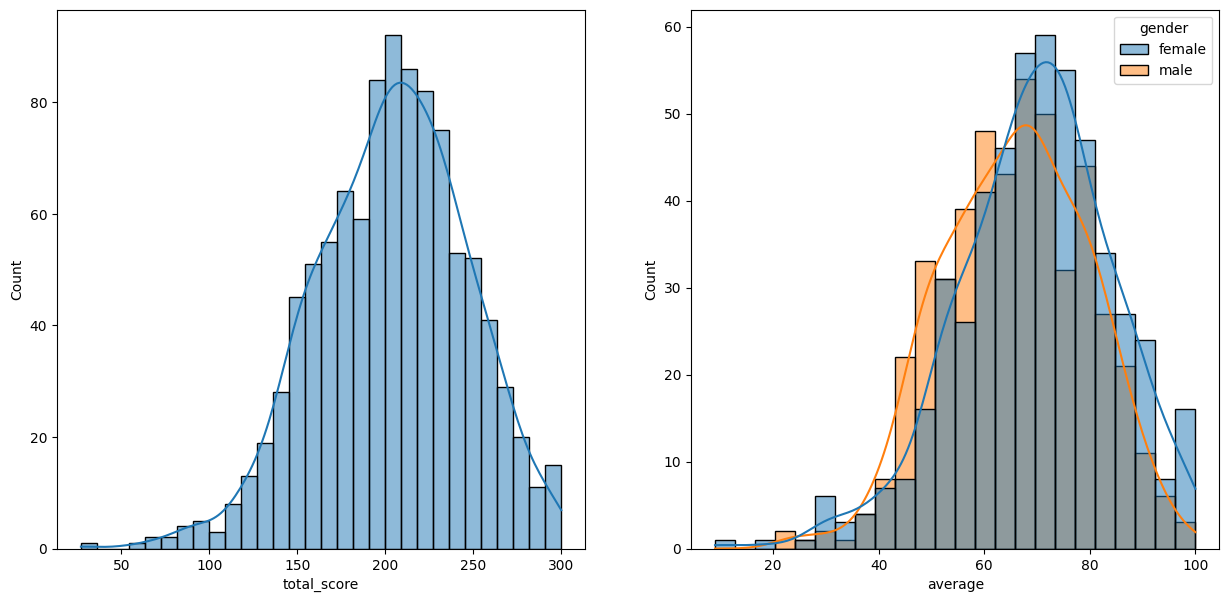

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True)
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()